In [1]:
import numpy as np
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS
from sklearn.decomposition import PCA, KernelPCA
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.neighbors import NearestNeighbors

## 20 Newsgroups

Zbiór około 20000 artykułów podzielonym równomiernie na 20 tematów.

| comp.graphics<br>comp.os.ms-windows.misc<br>comp.sys.ibm.pc.hardware<br>comp.sys.mac.hardware<br>comp.windows.x  |    rec.autos<br>rec.motorcycles<br>rec.sport.baseball<br>rec.sport.hockey     |  sci.crypt<br>sci.electronics<br>sci.med<br>sci.space |
|:----------|-------------|------|
| misc.forsale	 |  talk.politics.misc<br>talk.politics.guns<br>talk.politics.mideast | talk.religion.misc<br>alt.atheism<br>soc.religion.christian |

In [2]:
# 'alt.atheism', 
# 'comp.graphics', 
# 'comp.os.ms-windows.misc', 
# 'comp.sys.ibm.pc.hardware', 
# 'comp.sys.mac.hardware', 
# 'comp.windows.x',
# 'misc.forsale',
# 'rec.autos',
# 'rec.motorcycles',
# 'rec.sport.baseball',
# 'rec.sport.hockey',
# 'sci.crypt',
# 'sci.electronics',
# 'sci.med',
# 'sci.space',
# 'soc.religion.christian',
# 'talk.politics.guns',
# 'talk.politics.mideast',
# 'talk.politics.misc',
# 'talk.religion.misc'

# MY CATEGORIES
categ = ['alt.atheism', 'talk.religion.misc', 'soc.religion.christian', 'sci.space']

In [3]:
# DATASET
my_dataset = fetch_20newsgroups(categories=categ)

In [4]:
# FIRST ARTICLE FROM DATASET
print(my_dataset.data[0])

From: tcsteven@iaserv.b1.ingr.com (Todd Stevens)
Subject: Rebuilding the Temple (was Re: Anybody out there?)
Organization: ingr
Lines: 14

Chuck Petch writes:

>Now it appears that nothing stands in the way of rebuilding and resuming
>sacrifices, as the Scriptures indicate will happen in the last days.
>Although the Israeli government will give the permission to start, I think
>it is the hand of God holding the project until He is ready to let it
>happen. Brothers and sisters, the time is at hand. Our redemption is
>drawing near. Look up!

How is a scriptural Levitical priesthood resumed?  Are there any Jews who 
can legitimately prove their Levite bloodline?

Todd Stevens
tcsteven@iaserv.b1.ingr.com



In [5]:
# CATEGORIES OF FIRST 10 ARTICLES
print(my_dataset.filenames[:10])

# CATEGORY ID FOR EACH OF FIRST 10 ARTICLES
print(my_dataset.target[:10])

['/home/krzysztof/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20609'
 '/home/krzysztof/scikit_learn_data/20news_home/20news-bydate-train/alt.atheism/53213'
 '/home/krzysztof/scikit_learn_data/20news_home/20news-bydate-train/alt.atheism/53185'
 '/home/krzysztof/scikit_learn_data/20news_home/20news-bydate-train/sci.space/61033'
 '/home/krzysztof/scikit_learn_data/20news_home/20news-bydate-train/talk.religion.misc/84202'
 '/home/krzysztof/scikit_learn_data/20news_home/20news-bydate-train/talk.religion.misc/83455'
 '/home/krzysztof/scikit_learn_data/20news_home/20news-bydate-train/alt.atheism/53527'
 '/home/krzysztof/scikit_learn_data/20news_home/20news-bydate-train/sci.space/60821'
 '/home/krzysztof/scikit_learn_data/20news_home/20news-bydate-train/alt.atheism/54473'
 '/home/krzysztof/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20613']
[2 0 0 1 3 3 0 1 0 2]


## TF-IDF

Metoda obliczająca wagi słów w oparciu o liczbę ich wystąpień

$(tf-idf)_{i,j} = tf_{i,j} * idf_{i}$<br><br>
$tf_{i,j} = \dfrac{n_{i,j}}{\sum_{k} n_{k,j}}$<br><br>
$idf_{i} = \log{\dfrac{D}{d}}$

In [6]:
# TF-IDF Vectorization
# vectorizer kwarg stop_words=['and', 'the']
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(my_dataset.data)

In [7]:
# ALL TERMS FOUND IN ARTICLES FROM THE DATASET
print(vectorizer.get_feature_names())


['00', '000', '0000', '00000', '000000', '000021', '000062david42', '0000vec', '0001', '000406', '00041032', '0004136', '0004246', '0004422', '00044513', '0004847546', '0005', '00090711', '001125', '0012', '0014', '001428', '001555', '001718', '001757', '0018', '0020', '0022', '0028', '0029', '0033', '0034', '003719', '006', '00630', '0065', '0098', '01', '0100', '010116', '010326', '010329', '010734', '010821', '011033', '011255', '011634edt', '012536', '012537', '013034', '0131', '013423tan102', '013657', '014305', '014506', '01463', '01580', '015931', '01609', '01742', '01776', '01826', '018b', '0192', '0195', '01wb', '02', '020021', '020259', '020359', '020504', '020655', '020701tan102', '02115', '02138', '02139', '021635', '02173', '02178', '022621tan102', '023044', '0233', '023b', '024150', '024423', '0245', '024626', '024850', '025426', '025636', '025924', '0273', '03', '030', '0300', '030334', '030734', '031905saundrsg', '0324', '033', '033230kevxu', '033446', '034', '034101', 

In [8]:
print(vectors.shape)

(2049, 32477)


In [9]:
X = vectors.toarray()
Y = my_dataset.target
LABELS = my_dataset.target_names

## T-SNE

Narzędzie do wizualizacji danych wielowymiarowych. Konwertuje podobieństwa między dwoma punktami do wspólnych prawdopodobieństw i próbuje zminimalizować rozbieżność Kullbacka-Leiblera między wspólnymi prawdopodobieństwami nisko-wymiarowego osadzania.

In [10]:
tsne = TSNE(method='exact')
x_tsne = tsne.fit_transform(X)

In [11]:
def show_chart(points, classes, labels, figsize=(12, 12)):
    target_ids = range(len(labels))

    plt.figure(figsize=figsize)
    for i, label in zip(target_ids, labels):
        plt.scatter(points[classes==i, 0], points[classes==i, 1], label=label)

    plt.legend()
    plt.show()

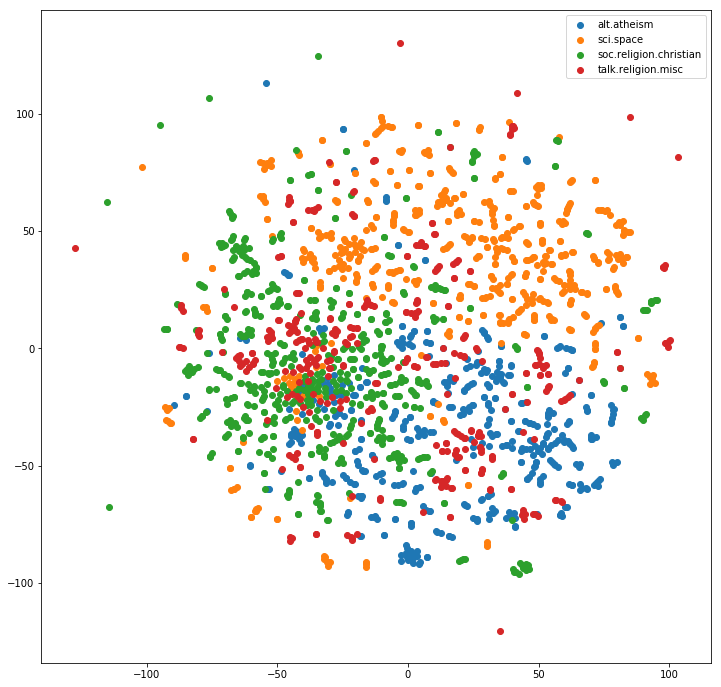

In [12]:
show_chart(x_tsne, Y, LABELS)

## BH-SNE

Metoda analogiczna do T-SNE, posiadająca złożoność obliczeniową O(n logn). Redukcja z O(n^2) osiągnięta za pomocą aproksymacji Barnesa-Huta.

In [13]:
bhsne = TSNE(method='barnes_hut')
x_bhsne = bhsne.fit_transform(X)

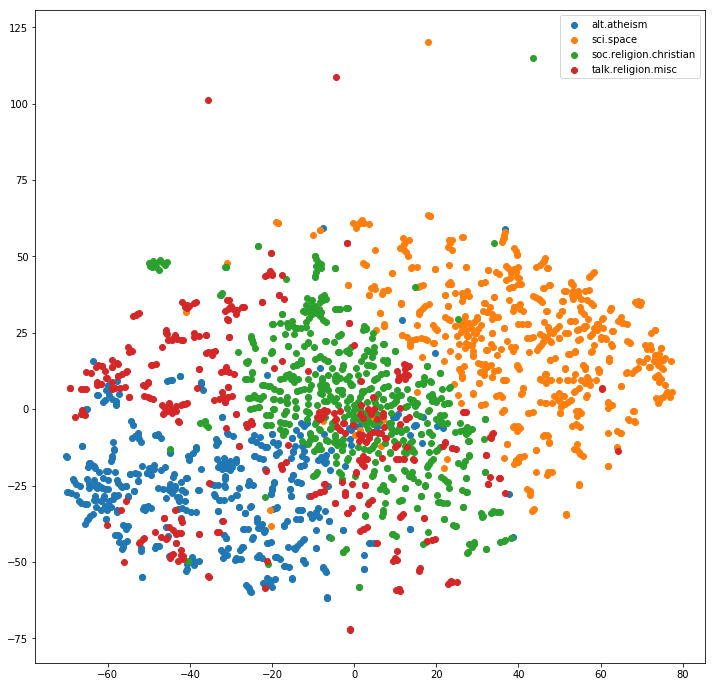

In [14]:
show_chart(x_bhsne, Y, LABELS)

## DICTIONARY FILTRATION RESULTS

In [13]:
# REMOVE UNNECESSARY PARTS OF ARTICLES
my_dataset = fetch_20newsgroups(categories=categ, remove=('headers', 'footers'))

In [14]:
# FIRST ARTICLE FROM DATASET
print(my_dataset.data[0])

Chuck Petch writes:

>Now it appears that nothing stands in the way of rebuilding and resuming
>sacrifices, as the Scriptures indicate will happen in the last days.
>Although the Israeli government will give the permission to start, I think
>it is the hand of God holding the project until He is ready to let it
>happen. Brothers and sisters, the time is at hand. Our redemption is
>drawing near. Look up!

How is a scriptural Levitical priesthood resumed?  Are there any Jews who 
can legitimately prove their Levite bloodline?


In [15]:
# REMOVE ENGLISH STOP WORDS - AND, THE etc.
vectorizer = TfidfVectorizer(stop_words='english', min_df=5)
vectors = vectorizer.fit_transform(my_dataset.data)

In [16]:
print(vectorizer.get_stop_words())

frozenset({'anywhere', 'below', 'around', 'co', 'eg', 'amoungst', 'do', 'on', 'else', 'how', 'about', 'perhaps', 'formerly', 'have', 'throughout', 'we', 'six', 'himself', 'sixty', 'top', 'whom', 'why', 'over', 'rather', 'yours', 'mostly', 'least', 'at', 'nobody', 'along', 'detail', 'are', 'this', 'up', 'anyone', 'anyway', 'always', 'bill', 'sincere', 'towards', 'above', 'has', 'nor', 'themselves', 'although', 'keep', 'namely', 'own', 'hasnt', 'in', 'not', 'per', 're', 'sometimes', 'latter', 'mine', 'whereas', 'con', 'off', 'full', 'therein', 'whenever', 'herself', 'seeming', 'under', 'while', 'hers', 'our', 'another', 'into', 'same', 'whatever', 'name', 'still', 'he', 'nevertheless', 'put', 'they', 'however', 'thru', 'had', 'onto', 'amount', 'for', 'before', 'any', 'being', 'describe', 'serious', 'thick', 'among', 'without', 'further', 'several', 'get', 'hundred', 'bottom', 'one', 'ever', 'those', 'besides', 'his', 'so', 'hereupon', 'out', 'found', 'itself', 'yourself', 'became', 'whoe

In [17]:
print(vectorizer.get_feature_names())

['00', '000', '0005', '01', '02', '03', '04', '05', '06', '07', '08', '081052', '09', '10', '100', '1000', '101', '102', '10th', '11', '111', '11292', '12', '1200', '125', '128', '13', '130', '135', '14', '1400', '145', '147', '15', '150', '1500', '16', '168730', '17', '18', '18084tm', '19', '190493200420', '1915', '1950', '1958', '1960', '1960s', '1963', '1965', '1970', '1971', '1972', '1973', '1976', '1977', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1993apr10', '1993apr13', '1993apr14', '1993apr15', '1993apr16', '1993apr17', '1993apr18', '1993apr19', '1993apr2', '1993apr20', '1993apr21', '1993apr22', '1993apr23', '1993apr3', '1993apr5', '1993apr6', '1993e', '1994', '1996', '1999', '19th', '1b', '1g', '1qie61', '1qjahh', '1st', '20', '200', '2000', '201', '202', '203', '20apr199301460499', '20th', '21', '211638', '213', '216', '2178', '22', '23', '24', '24th', '25', '250', '26', '264', '27', '28', '28388', 

In [18]:
print(vectors.shape)

(2049, 7154)


In [10]:
X = vectors.toarray()
Y = my_dataset.target
LABELS = my_dataset.target_names

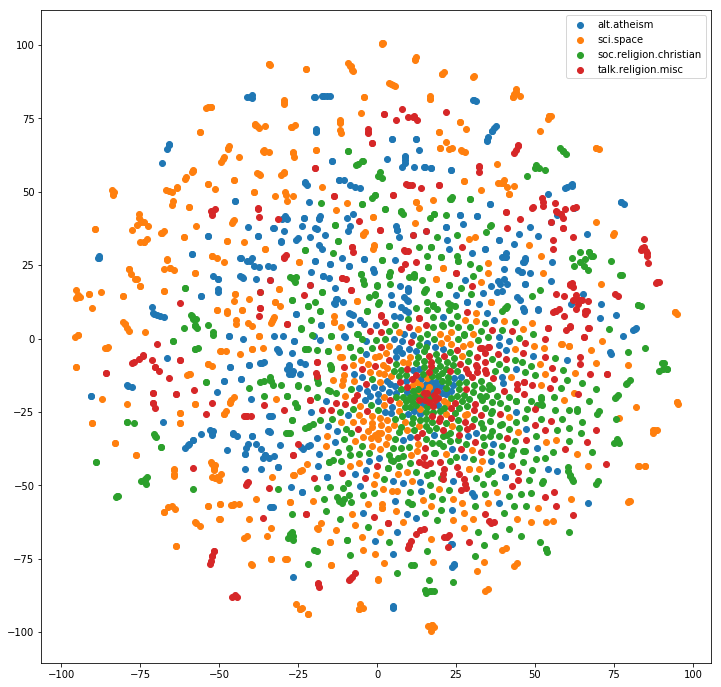

In [13]:
tsne = TSNE(method='exact')
x_tsne = tsne.fit_transform(X)
show_chart(x_tsne, Y, LABELS)

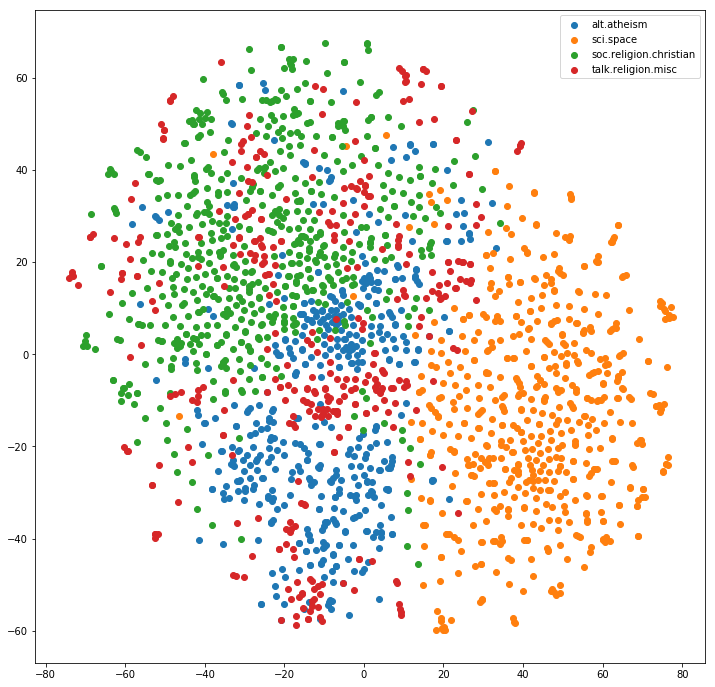

In [14]:
bhsne = TSNE(method='barnes_hut')
x_bhsne = bhsne.fit_transform(X)
show_chart(x_bhsne, Y, LABELS)

## WYNIKI PO WSTĘPNEJ REDUKCJI WYMIARÓW SŁOWNIKA

In [25]:
x_dim30 = PCA(n_components=30).fit_transform(X)
print(x_dim30.shape)

(2049, 30)


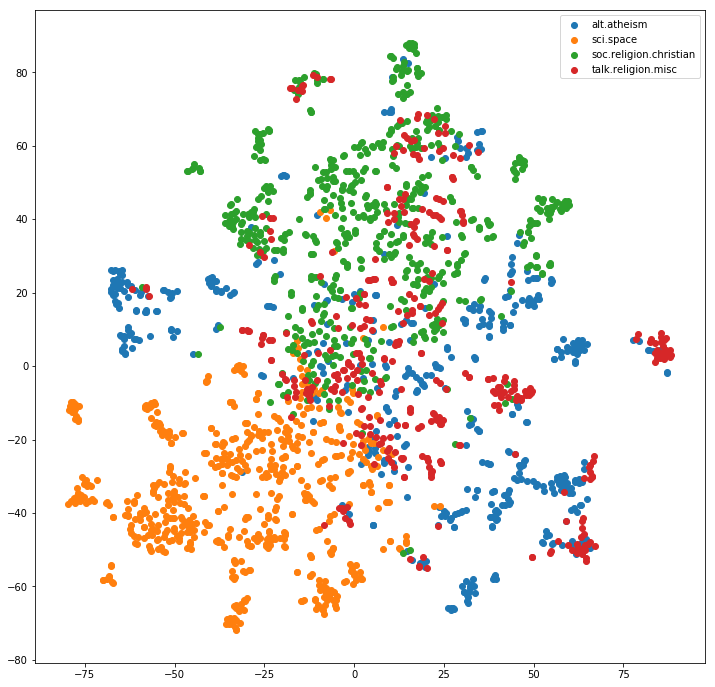

In [26]:
x_dim30_tsne = tsne.fit_transform(x_dim30)
show_chart(x_dim30_tsne, Y, LABELS)

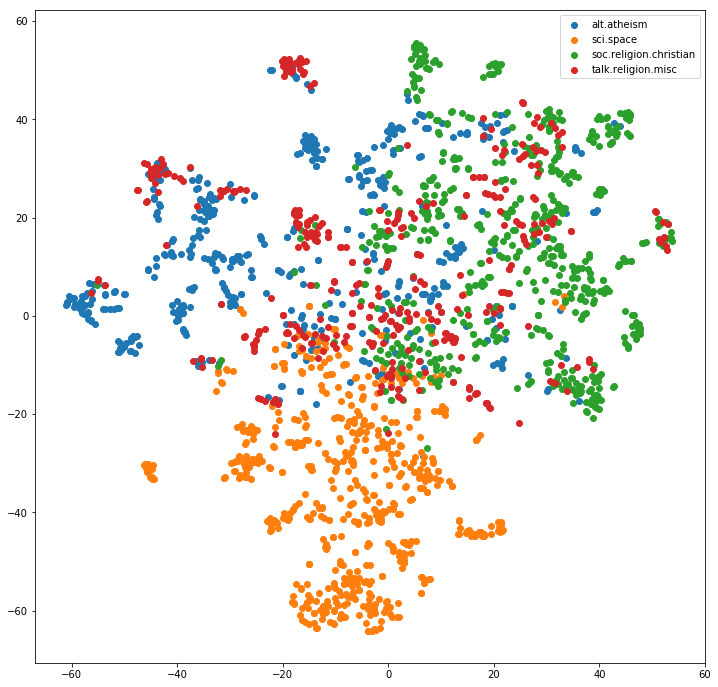

In [27]:
x_dim30_bhsne = bhsne.fit_transform(x_dim30)
show_chart(x_dim30_bhsne, Y, LABELS)

## MDS

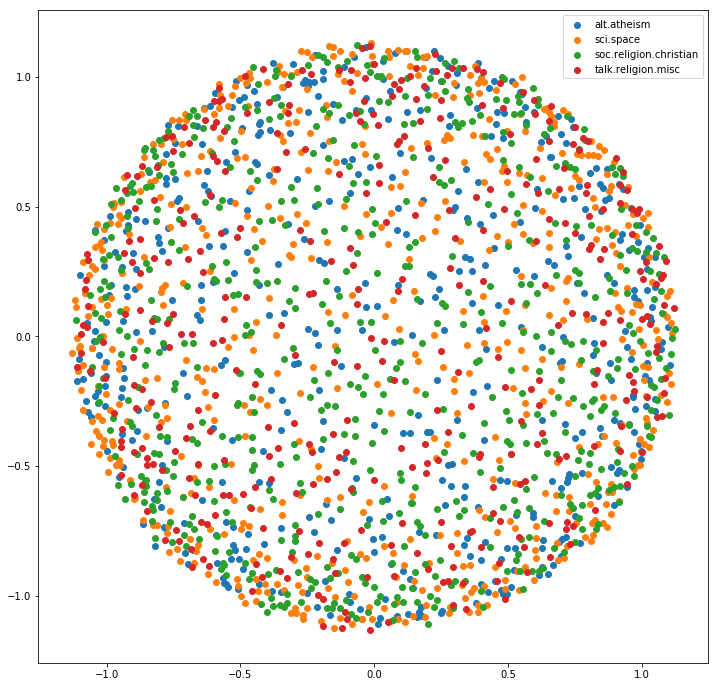

In [28]:
x_mds = MDS(n_components=2, max_iter=10).fit_transform(X)
show_chart(x_mds, Y, LABELS)

## All Dataset

In [29]:
my_dataset = fetch_20newsgroups()
vectorizer = TfidfVectorizer(stop_words='english', min_df=5)
vectors = vectorizer.fit_transform(my_dataset.data)
X = vectors.toarray()
Y = my_dataset.target
LABELS = my_dataset.target_names

In [30]:
x_dim20 = PCA(n_components=20).fit_transform(X)
print(x_dim20.shape)

(11314, 20)


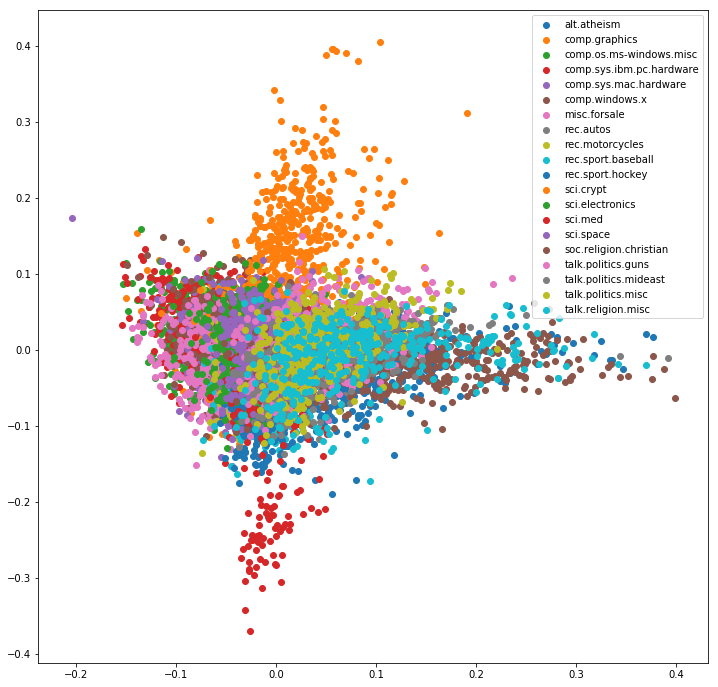

In [32]:
show_chart(x_dim20, Y, LABELS)

## Metryki

In [16]:
# METRYKI
def near_nei(k, samples):    
    nbrs = NearestNeighbors(k+1, algorithm='ball_tree').fit(samples)
    distances, indexes = nbrs.kneighbors(samples)
    res = []
    for index in indexes:
      tmp = samples.shape[0]
      if index[0] < (tmp)/2:
        res.append((len(list(filter(lambda x: x < len(samples)/2, index)))-1)/k)
      else:
        res.append((len(list(filter(lambda x: x >= len(samples)/2, index)))-1)/k)
      
    return np.mean(res)


def knn(k, n ,samples, method, M):
    nbrs_n_dim = NearestNeighbors(k, algorithm='ball_tree').fit(samples)
    _, indexes_in_n_dim = nbrs_n_dim.kneighbors(samples)
    samples_in_2_dim = method.fit_transform(samples)
    nbrs_2_dim = NearestNeighbors(k, algorithm='ball_tree').fit(samples_in_2_dim)
    _, indexes_in_2_dim = nbrs_2_dim.kneighbors(samples_in_2_dim)
    same_neighbors = 0
    for a,b in zip(indexes_in_n_dim,indexes_in_2_dim):
        same_neighbors += len(set(a).intersection(set(b)))
    return same_neighbors/(k*M)

In [36]:
print("TSNE", near_nei(15, x_tsne))
print("BHSNE", near_nei(15, x_bhsne))

TSNE 0.4984219944688466
BHSNE 0.5006344558321133


In [17]:
print("TSNE", knn(3, 3, X, tsne, len(X)))

TSNE 0.6266471449487555


In [18]:
print("BHSNE", knn(3, 3, X, bhsne, len(X)))

BHSNE 0.6466569058077111


## ZADANIE 1
Dla wybranego podzbioru 20NewsGroups (3-4 tematy) przeprowadzić wektoryzacje TF-IDF, dokonać redukcji słownika (według potrzeb) oraz porównać wizualizację metodami T-SNE, BH-SNE z wybranymi dwoma pozostałymi - (PCA lub KPCA) i  (LLE lub ISOMAP). Sprawdzić jaki wpływ na wizualizację metodami T-SNE i BH-SNE mają parametry **perplexity** i **learning rate**.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
# pca = PCA()
# x_pca = pca.fit_transform(X)
# show_chart(x_pca, Y, LABELS)

# kpca = KernelPCA()
# x_kpca = kpca.fit_transform(X)
# show_chart(x_kpca, Y, LABELS)

# lle = LocallyLinearEmbedding()
# x_lle = lle.fit_transform(X)
# show_chart(x_lle, Y, LABELS)

# isomap = Isomap()
# x_isomap = isomap.fit_transform(X)
# show_chart(x_isomap, Y, LABELS)

## ZADANIE 2
Wyznaczyć metryki dla metod T-SNE, BH-SNE i wybranych metod z zadania 1.